Category Embedding

In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/houseprice.csv",usecols=["SalePrice","MSSubClass","MSZoning","LotFrontage","LotArea","Street","YearBuilt","LotShape","1stFlrSF","2ndFlrSF"]).dropna()

In [3]:
df.shape

(1201, 10)

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [6]:
for i in df.columns:
  print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [7]:
import datetime
datetime.datetime.now().year

2024

In [8]:
df["Total Years"]=datetime.datetime.now().year - df["YearBuilt"]

In [9]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,21
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,48
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,23
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,109
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,24


In [10]:
df.drop("YearBuilt",axis=1,inplace=True)

In [11]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [12]:
#Creating Categorical Features
cat_features=["MSSubClass","MSZoning","Street","LotShape"]
out_features="SalesPrice"

In [13]:
df["MSSubClass"].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85])

In [14]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"]=LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0])

In [15]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [16]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
  lbl_encoders[feature]=LabelEncoder()
  df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [17]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,25
1456,0,3,85.0,13175,1,3,2073,0,210000,46
1457,6,3,66.0,9042,1,3,1188,1152,266500,83
1458,0,3,68.0,9717,1,3,1078,0,142125,74


In [18]:
#Stacking and Converting into Tensors
import numpy as np
cat_features=np.stack([df["MSSubClass"],df["MSZoning"],df["Street"],df["LotShape"]],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [19]:
#convert numpy to Tensor
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [20]:
#create continuous variable
cont_features=[]
for i in df.columns:
  if i in ["MSSubClass","MSZoning","Street","LotShape","SalePrice"]:
    pass
  else:
    cont_features.append(i)

In [21]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [22]:
#stacking continous variable to a tensor
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [23]:
cont_values.dtype

torch.float32

In [24]:
#dependent Feature
y=torch.tensor(df["SalePrice"].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [26]:
df.shape

(1201, 10)

In [27]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [28]:
len(df["MSSubClass"].unique())

15

### **Embedding size for categorial columns**

In [29]:
cat_dims=[len(df[col].unique()) for col in ["MSSubClass","MSZoning","Street","LotShape"]]
cat_dims

[15, 5, 2, 4]

In [30]:
#thumbs rule o/p dim should be setbased on the i/p dim(min(50,features dim/2))
embedding_dim=[(x,min(50,(x+1) // 2))for x in cat_dims]
#preprocessing steps
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [32]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [33]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [34]:
pd.set_option("display.max_rows",500)
embedding_val=[]
for i,e in enumerate(embed_representation):
  embedding_val.append(e(cat_features[:,i]))
embedding_val

[tensor([[-0.6335,  0.9060,  1.0310,  ...,  0.6423,  0.5210,  0.9083],
         [ 0.1281, -1.7366,  0.1260,  ...,  0.4203,  0.3960,  0.6053],
         [-0.6335,  0.9060,  1.0310,  ...,  0.6423,  0.5210,  0.9083],
         ...,
         [-0.4962, -0.4305,  0.8633,  ...,  0.5980, -0.8967,  0.1173],
         [ 0.1281, -1.7366,  0.1260,  ...,  0.4203,  0.3960,  0.6053],
         [ 0.1281, -1.7366,  0.1260,  ...,  0.4203,  0.3960,  0.6053]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-1.0628, -0.1836, -0.7535],
         [-1.0628, -0.1836, -0.7535],
         [-1.0628, -0.1836, -0.7535],
         ...,
         [-1.0628, -0.1836, -0.7535],
         [-1.0628, -0.1836, -0.7535],
         [-1.0628, -0.1836, -0.7535]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.5819],
         [-0.5819],
         [-0.5819],
         ...,
         [-0.5819],
         [-0.5819],
         [-0.5819]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.2062, -1.4440],
         [-0.2062, -1.4440],
         [-1.9782,  0.

In [35]:
z=torch.cat(embedding_val,1)
z

tensor([[-0.6335,  0.9060,  1.0310,  ..., -0.5819, -0.2062, -1.4440],
        [ 0.1281, -1.7366,  0.1260,  ..., -0.5819, -0.2062, -1.4440],
        [-0.6335,  0.9060,  1.0310,  ..., -0.5819, -1.9782,  0.3628],
        ...,
        [-0.4962, -0.4305,  0.8633,  ..., -0.5819, -0.2062, -1.4440],
        [ 0.1281, -1.7366,  0.1260,  ..., -0.5819, -0.2062, -1.4440],
        [ 0.1281, -1.7366,  0.1260,  ..., -0.5819, -0.2062, -1.4440]],
       grad_fn=<CatBackward0>)

In [36]:
#Implement dropout
dropout=nn.Dropout(.4)

In [37]:
final_embed=dropout(z)
final_embed

tensor([[-1.0558,  1.5100,  1.7183,  ..., -0.0000, -0.0000, -2.4067],
        [ 0.0000, -0.0000,  0.2101,  ..., -0.0000, -0.3436, -2.4067],
        [-0.0000,  0.0000,  1.7183,  ..., -0.0000, -0.0000,  0.0000],
        ...,
        [-0.0000, -0.0000,  0.0000,  ..., -0.9699, -0.3436, -2.4067],
        [ 0.0000, -2.8944,  0.2101,  ..., -0.0000, -0.3436, -2.4067],
        [ 0.0000, -0.0000,  0.0000,  ..., -0.9699, -0.3436, -0.0000]],
       grad_fn=<MulBackward0>)

In [38]:
#create a feed forward Neural network
class FeedForwardNN(nn.Module):
  def __init__(self,embedding_dim,n_cont,out_sz,layers,p=0.5):
    super().__init__()
    self.embeds=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
    self.emb_drop=nn.Dropout(p)
    self.bn_cont=nn.BatchNorm1d(n_cont)

    layerlist=[]
    n_emb=sum((out for inp,out in embedding_dim))
    n_in=n_emb + n_cont

    for i in layers:
      layerlist.append(nn.Linear(n_in,i))
      layerlist.append(nn.ReLU(inplace=True))
      layerlist.append(nn.BatchNorm1d(i))
      layerlist.append(nn.Dropout(p))
      n_in=i
    layerlist.append(nn.Linear(layers[-1],out_sz))

    self.layers=nn.Sequential(*layerlist)

  def forward(self,x_cat,x_cont):
    embeddings=[]
    for i,e in enumerate(self.embeds):
      embeddings.append(e(x_cat[:,i]))
    x=torch.cat(embeddings,1)
    x=self.emb_drop(x)

    x_cont=self.bn_cont(x_cont)
    x=torch.cat([x,x_cont],1)
    x=self.layers(x)
    return x

In [39]:
len(cont_features)

5

In [40]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [41]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

### **Define loss and optimizer**

In [42]:
loss_function=nn.MSELoss() #later convert to RMSE
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [43]:
df.shape

(1201, 10)

In [44]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [45]:
cont_values.shape

torch.Size([1201, 5])

In [46]:
batch_size=1200
test_size=int(batch_size*.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [47]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [48]:
epochs=5000
final_losses=[]
for i in range(epochs):
  i=i+1
  y_pred=model(train_categorical,train_cont)
  loss=torch.sqrt(loss_function(y_pred,y_train)) #RMSE
  final_losses.append(loss.detach().numpy())
  if i%10==1:
    print("Epoch number: {} and the loss: {:.4f}".format(i,loss.item()))
  optimizer.zero_grad()
  loss.backward() #backpropagation
  optimizer.step()

Epoch number: 1 and the loss: 200496.7500
Epoch number: 11 and the loss: 200493.4688
Epoch number: 21 and the loss: 200489.1406
Epoch number: 31 and the loss: 200482.6250
Epoch number: 41 and the loss: 200473.2500
Epoch number: 51 and the loss: 200461.3750
Epoch number: 61 and the loss: 200446.4375
Epoch number: 71 and the loss: 200429.4062
Epoch number: 81 and the loss: 200407.9375
Epoch number: 91 and the loss: 200383.4219
Epoch number: 101 and the loss: 200355.2344
Epoch number: 111 and the loss: 200322.0938
Epoch number: 121 and the loss: 200291.5312
Epoch number: 131 and the loss: 200251.8438
Epoch number: 141 and the loss: 200205.9688
Epoch number: 151 and the loss: 200163.1719
Epoch number: 161 and the loss: 200112.2969
Epoch number: 171 and the loss: 200059.3281
Epoch number: 181 and the loss: 200006.1094
Epoch number: 191 and the loss: 199946.9219
Epoch number: 201 and the loss: 199881.3750
Epoch number: 211 and the loss: 199815.5938
Epoch number: 221 and the loss: 199737.9375

Text(0, 0.5, 'RMSE Loss')

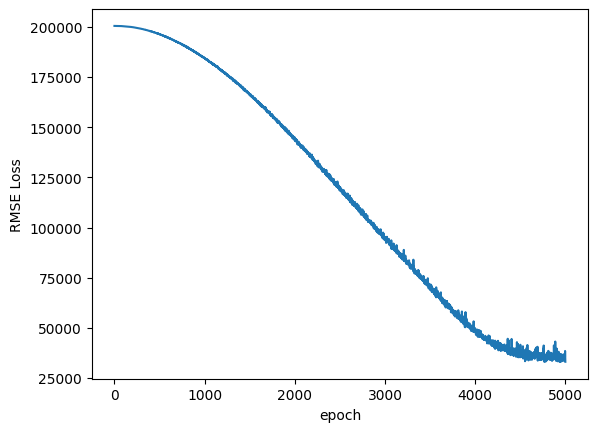

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),final_losses)
plt.xlabel("epoch")
plt.ylabel("RMSE Loss")

In [50]:
#Validate the test data
y_pred=""
with torch.no_grad():
  y_pred=model(test_categorical,test_cont)
  loss=torch.sqrt(loss_function(y_pred,y_test))
print("RMSE: {}".format(loss))

RMSE: 41728.37890625


In [51]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])
data_verify

,Test
0,130000.0
1,138887.0
2,175500.0
3,195000.0
4,142500.0
5,265900.0
6,224900.0
7,248328.0
8,170000.0
9,465000.0


In [52]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])
data_predicted

,Prediction
0,142928.109375
1,206637.671875
2,149318.937500
3,199075.328125
4,199728.671875
5,203454.734375
6,155577.078125
7,296968.562500
8,154515.734375
9,343047.500000


In [53]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output["Difference"]=final_output["Test"]-final_output["Prediction"]
final_output.head()

,Test,Prediction,Difference
0,130000.0,142928.109375,-12928.109375
1,138887.0,206637.671875,-67750.671875
2,175500.0,149318.937500,26181.062500
3,195000.0,199075.328125,-4075.328125
4,142500.0,199728.671875,-57228.671875


In [56]:
#save the model
torch.save(model,"HousePrice.pt")

In [57]:
torch.save(model.state_dict(),"HouseWeights.pt")

In [58]:
#Loading the saved model
embs_size=[(15,8),(5,3),(2,1),(4,2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [59]:
model1.load_state_dict(torch.load("HouseWeights.pt"))

<All keys matched successfully>

In [60]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)